In [71]:
! pip install statsmodels

You should consider upgrading via the 'c:\users\saidj\onedrive\documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\scripts\python.exe -m pip install --upgrade pip' command.


In [72]:
import os
import sys
root_dir = os.path.abspath(os.path.join(os.path.dirname('pruebillas.ipynb'), '..'))
os.chdir(root_dir)
sys.path.insert(0, os.path.join(root_dir, 'src'))

In [88]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover, plot_heatmaps, resample_apply, barssince
from backtesting.test import GOOG
import seaborn as sns

import pandas as pd
import talib as ta

In [74]:
def  optim_func(series):
    return series['Return [%]'] / (-1*series['Max. Drawdown [%]'])

In [89]:
class RsiOscilator(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    def init(self):
        self.daily_rsi = self.I(ta.RSI, self.data.Close, self.rsi_window)
        self.weekly_rsi = resample_apply(
            'W-FRI', ta.RSI, self.data.Close, self.rsi_window
        )

    def next(self):
        if barssince(self.daily_rsi > self.upper_bound) == 2 and crossover(self.weekly_rsi, self.upper_bound):
            self.position.close()
        elif barssince(self.daily_rsi < self.lower_bound) == 2 and crossover(self.weekly_rsi, self.lower_bound):
            self.buy()


In [91]:
# start_date = '2022-01-01'
# end_date = '2022-02-01'


bt = Backtest(
    GOOG, 
    RsiOscilator, 
    cash=10000, 
    commission=0.02
)

# stats = bt.run()
stats, heatmap = bt.optimize(
    upper_bound=range(50, 85, 5),
    lower_bound=range(10, 45, 5),
    rsi_window=range(10, 20, 2),
    maximize='Sharpe Ratio',
    # maximize=optim_func,
    # max_tries=100,
    return_heatmap=True
)

stats

  0%|          | 0/9 [00:00<?, ?it/s]

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   30.959032
Equity Final [$]                    16319.652
Equity Peak [$]                     16500.652
Return [%]                           63.19652
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    5.914375
Volatility (Ann.) [%]               15.180675
Sharpe Ratio                         0.389599
Sortino Ratio                        0.612872
Calmar Ratio                         0.236149
Max. Drawdown [%]                  -25.045127
Avg. Drawdown [%]                   -3.998086
Max. Drawdown Duration      343 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      65.581401
Worst Trade [%]                     65.581401
Avg. Trade [%]                    

In [92]:
print(stats._strategy.lower_bound)
print(stats._strategy.upper_bound)
print(stats._strategy.rsi_window)

40
50
12


In [93]:
bt.plot(filename='./RsiOscilator.html')

c:\Users\SaidJ\OneDrive\Documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\SaidJ\OneDrive\Documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p11074', ...)

<Axes: xlabel='lower_bound', ylabel='upper_bound'>

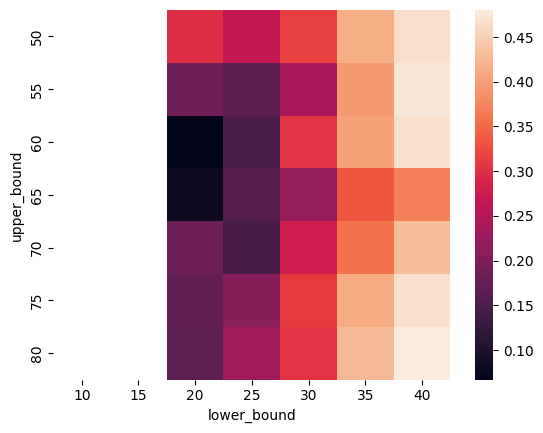

In [78]:
hm = heatmap.groupby(['upper_bound','lower_bound']).mean().unstack()
sns.heatmap(hm)

In [79]:
# plot_heatmaps(heatmap, agg='mean')

GridPlot(id='p6446', ...)

c:\Users\SaidJ\OneDrive\Documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\SaidJ\OneDrive\Documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p7309', ...)